<a href="https://colab.research.google.com/github/jacquelsn/IA-/blob/https%2Fcolab.research.google.com%2Fdrive%2F1cMPkWtq0mPav13-Sn3uc-BxjSmrcSYLY/PLN_4_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Carga e preparação dos dados

In [ ]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download', header=0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

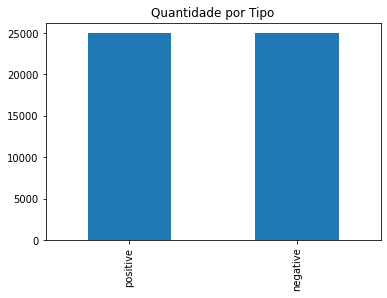

In [ ]:
df["sentiment"].value_counts().plot.bar(title='Quantidade por Tipo',rot=90)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
exemplo = df['review'].values[0]
print(exemplo)
print(len(exemplo.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
%%time
from nltk.tokenize import word_tokenize
import string
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)
TAMANHO_MIMINO = 1
IGNORAR = ['...', 'br','.so','\'ll']
def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    palavras = [i for i in palavras if len(i) > TAMANHO_MIMINO]
    palavras = [i.lower() for i in palavras if i not in IGNORAR]
    return palavras
df['review2'] = df['review'].apply(prepara)
df['review2'] = df['review2'].apply(' '.join)

CPU times: user 1min 40s, sys: 480 ms, total: 1min 41s
Wall time: 1min 41s


In [ ]:
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techni...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically 's family little boy jake thinks 's ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visuall...


### Modelagem estatística

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


In [ ]:
%%time
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tk_X_train = tokenizer.texts_to_sequences(X_train)
tk_X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

CPU times: user 9.07 s, sys: 111 ms, total: 9.18 s
Wall time: 9.22 s


In [ ]:
%%time
from keras.preprocessing.sequence import pad_sequences
max_len = 100
tk_pad_X_train = pad_sequences(tk_X_train, padding='post', maxlen=max_len)
tk_pad_X_test = pad_sequences(tk_X_test, padding='post', maxlen=max_len)

CPU times: user 460 ms, sys: 26.1 ms, total: 486 ms
Wall time: 468 ms


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:',ohe_y_train.shape)
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


### Embedding

In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%ls -la

total 320249
-rw------- 1 root root   2243257 Sep 10  2020 '7. examples.ipynb'
-rw------- 1 root root    105690 Sep  4  2020  aima_agents.ipynb
-rw------- 1 root root     82749 Oct 26 22:49  aima_logic.ipynb
drwx------ 2 root root      4096 Aug 31  2020  aima-python/
-rw------- 1 root root   1833759 Oct 14  2020  aima_search.ipynb
-rw------- 1 root root     16979 Apr 11 23:30 'Bonus - Reconhecimento de Entidades Nomeadas.ipynb'
-rw------- 1 root root  11782370 Nov 10 04:04  CopiaVC_1_Lab_09_MNIST_CNN_DataAug.ipynb
-rw------- 1 root root     20598 Jun 20  2020 'Copy of regression.ipynb'
-rw------- 1 root root     28475 Apr 23 23:01 'Curso PLN - Tópico 1.ipynb'
-rw------- 1 root root  23872904 Apr 24 00:11 'Curso PLN - Tópico 2 - DNN.ipynb'
-rw------- 1 root root     57752 Apr 23 23:52 'Curso PLN - Tópico 2.ipynb'
-rw------- 1 root root     58115 Apr 24 00:02 'Curso PLN - Tópico 2 - TF-IDF.ipynb'
-rw------- 1 root root    194757 Apr 26 21:00 'Curso PLN - Tópico 3 - CNN.ipynb'
-rw---

In [ ]:
%%time
import numpy as np
def create_embedding(path, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding = np.zeros((vocab_size, embedding_dim))
    with open(path) as f:
        for line in f:
            w, *vector = line.split()
            if w in word_index:
                idx = word_index[w]
                embedding[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding
embedding_dim = 50
embedding_matrix = create_embedding('glove.6B.50d.txt', tokenizer.word_index, embedding_dim)
print(embedding_matrix.shape)

(98411, 50)
CPU times: user 2.44 s, sys: 131 ms, total: 2.57 s
Wall time: 4.9 s


### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM
from keras.optimizers import Adam, Nadam

In [ ]:
NB_EPOCH = 3
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = Adam()

In [ ]:
model = Sequential()
#model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=OPTIMIZER, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          12596608  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 12,728,321
Trainable params: 12,728,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train,
                    epochs=NB_EPOCH,
                    verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/3
157/157 [==============================] - 56s 146ms/step - loss: 0.5479 - accuracy: 0.6817 - val_loss: 0.3077 - val_accuracy: 0.8752
Epoch 2/3
157/157 [==============================] - 22s 140ms/step - loss: 0.2297 - accuracy: 0.9126 - val_loss: 0.3288 - val_accuracy: 0.8767
Epoch 3/3
157/157 [==============================] - 22s 140ms/step - loss: 0.1780 - accuracy: 0.9339 - val_loss: 0.3032 - val_accuracy: 0.8744
CPU times: user 1min 52s, sys: 3.67 s, total: 1min 55s
Wall time: 1min 39s


In [ ]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print("Acurácia do Teste:  {:.4f}".format(accuracy))

Acurácia do Teste:  0.8744


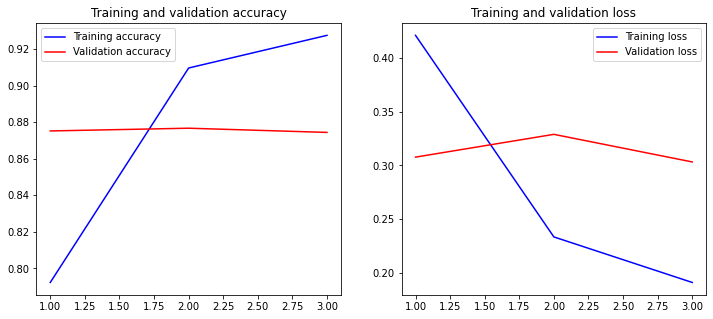

In [ ]:
plot_history(history)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Conv1D, MaxPooling1D
from keras.optimizers import Adam, Nadam

In [ ]:
NB_EPOCH = 3
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = Adam()

In [ ]:
model = Sequential()
#model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.6))
model.add(LSTM(128))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=OPTIMIZER, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          12596608  
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           12320     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train,
                    epochs=NB_EPOCH,
                    verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/3
157/157 [==============================] - 24s 139ms/step - loss: 0.5945 - accuracy: 0.6255 - val_loss: 0.2954 - val_accuracy: 0.8728
Epoch 2/3
157/157 [==============================] - 21s 135ms/step - loss: 0.2380 - accuracy: 0.9083 - val_loss: 0.2810 - val_accuracy: 0.8809
Epoch 3/3
157/157 [==============================] - 21s 135ms/step - loss: 0.1869 - accuracy: 0.9322 - val_loss: 0.2983 - val_accuracy: 0.8809
CPU times: user 1min 50s, sys: 2.45 s, total: 1min 53s
Wall time: 1min 6s


In [ ]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print("Acurácia do Teste:  {:.4f}".format(accuracy))

Acurácia do Teste:  0.8809


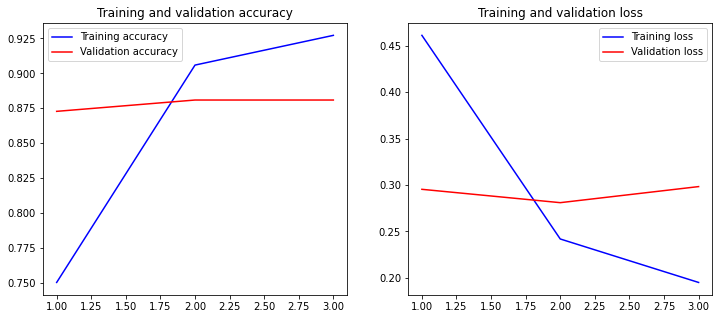

In [ ]:
plot_history(history)

FIM